## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
import sys
sys.path.append('../../')

from cossif import CosSIF
from plot_images import plot_images_last_four

## Create Folder

In [3]:
current_path = os.getcwd().replace(os.sep, '/')
save_path = os.path.join(current_path, 'ISIC-2016_FAGT_record')

if os.path.exists(save_path):
    print("Folder already exist!")
else:
    os.mkdir(save_path)
    
    print("Folders successfully created!")

Folders successfully created!


## Directories

In [4]:
root = os.path.abspath('../../../datasets/ISIC-2016')

In [5]:
secondary_cls_benign = root + '/split/train/benign'
secondary_cls_malignant = root + '/split/train/malignant'

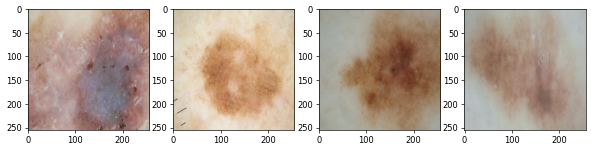

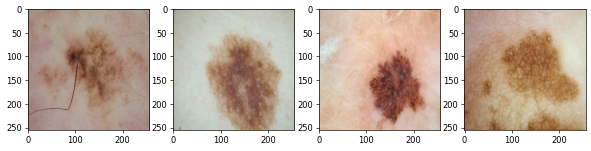

In [6]:
plot_images_last_four(secondary_cls_malignant)
plot_images_last_four(secondary_cls_benign)

In [7]:
hp = ['alpha_1', 'alpha_2', 'alpha_3']
classes = ['benign', 'malignant']
t_path = root + '/stylegan2-ada/oversampling/FAGT'

for i in hp: 
    for j in classes:
        globals()['target_cls_%s_%s' % (j, i)] = os.path.join(t_path, i, 'oversample', j)

## Calculate Similarities & Filter Images

In [8]:
cossif = CosSIF()

### α = 0.75 | alpha_1

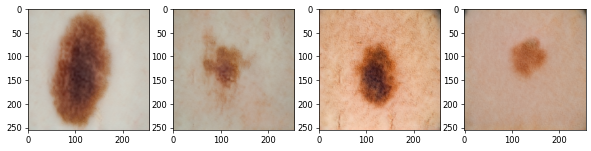

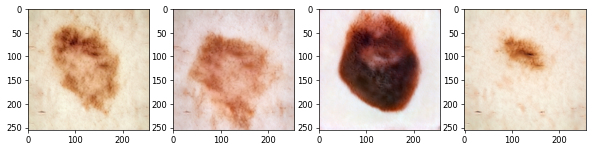

In [9]:
plot_images_last_four(target_cls_benign_alpha_1)
plot_images_last_four(target_cls_malignant_alpha_1)

In [10]:
#########################################
# target class: benign                  #
# type: synthetic images                #
# distribution: α = 0.75 | alpha_1      #
#########################################
# secondary class: benign               #
# type: real images                     #
#########################################
cossif.calculate_similarities(
    t_path=target_cls_benign_alpha_1, 
    s_path=secondary_cls_benign, 
    save_path=save_path, 
    file_name='ISIC-2016_FAGT_t_benign_alpha_1', 
    image_size=64,
    record_range=1
)

#########################################
# target class: malignant               #
# type: synthetic images                #
# distribution: α = 0.75 | alpha_1      #
#########################################
# secondary class: malignant            #
# type: real images                     #
#########################################
cossif.calculate_similarities(
    t_path=target_cls_malignant_alpha_1, 
    s_path=secondary_cls_malignant, 
    save_path=save_path, 
    file_name='ISIC-2016_FAGT_t_malignant_alpha_1', 
    image_size=64,
    record_range=1
)

+--------------+---------+
| TARGET CLASS | SAMPLES |
+--------------+---------+
|    benign    |   1441  |
+--------------+---------+
+-------------------------+---------+
| SECONDARY CLASS/CLASSES | SAMPLES |
+-------------------------+---------+
|          benign         |   727   |
+-------------------------+---------+
Resizing images of the target class...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1441/1441 [00:02<00:00, 558.84it/s]


Resizing images of the secondary class/classes...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:00<00:00, 786.78it/s]


Calculating Similarities...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1441/1441 [04:33<00:00,  5.27it/s]


+--------------+---------+
| TARGET CLASS | SAMPLES |
+--------------+---------+
|  malignant   |   1530  |
+--------------+---------+
+-------------------------+---------+
| SECONDARY CLASS/CLASSES | SAMPLES |
+-------------------------+---------+
|        malignant        |   173   |
+-------------------------+---------+
Resizing images of the target class...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1530/1530 [00:02<00:00, 519.70it/s]


Resizing images of the secondary class/classes...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 742.24it/s]


Calculating Similarities...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1530/1530 [01:08<00:00, 22.31it/s]


In [11]:
t_benign = np.load(os.path.join(save_path, 'ISIC-2016_FAGT_t_benign_alpha_1.npy'), allow_pickle=True)
t_malignant = np.load(os.path.join(save_path, 'ISIC-2016_FAGT_t_malignant_alpha_1.npy'), allow_pickle=True)

loaded_records = [
    {'class': 'benign', 'records': t_benign, 'type': 'dissimilar'}, 
    {'class': 'malignant', 'records': t_malignant, 'type': 'similar'}, 
]

alpha = {'id':'alpha_1', 'value': 0.75}

for i in loaded_records:
    print(f"{i['class']} || {alpha['id']} || {'{:.2f}'.format(alpha['value'])}")
    source_path = os.path.join(root, f"stylegan2-ada/oversampling/FAGT/{alpha['id']}/oversample/{i['class']}")
    filtered_path = os.path.join(root, f"stylegan2-ada/oversampling/FAGT/{alpha['id']}/filtered/{i['class']}")
    removed_path = os.path.join(root, f"stylegan2-ada/oversampling/FAGT/{alpha['id']}/removed/{i['class']}")

    cossif.export_filtered_images(
        source_dir=source_path, 
        filtered_dir=filtered_path, 
        removed_dir=removed_path, 
        set_R=i['records'], 
        remove=i['type'],
        alpha=alpha['value']
    )

benign || alpha_1 || 0.75
+--------------+-----------------+----------------+--------------------+------------+
| Total Images | Filtered Images | Removed Images |  Threshold Score   |   Order    |
+--------------+-----------------+----------------+--------------------+------------+
|     1441     |       1081      |      360       | 0.9903861780571926 | Dissimilar |
+--------------+-----------------+----------------+--------------------+------------+


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1441/1441 [00:07<00:00, 200.58it/s]


malignant || alpha_1 || 0.75
+--------------+-----------------+----------------+--------------------+---------+
| Total Images | Filtered Images | Removed Images |  Threshold Score   |  Order  |
+--------------+-----------------+----------------+--------------------+---------+
|     1530     |       1148      |      382       | 0.9919488175759373 | Similar |
+--------------+-----------------+----------------+--------------------+---------+


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1530/1530 [00:10<00:00, 152.94it/s]


### α = 0.80 | alpha_2

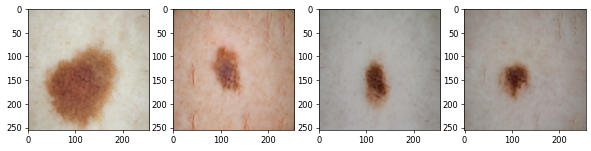

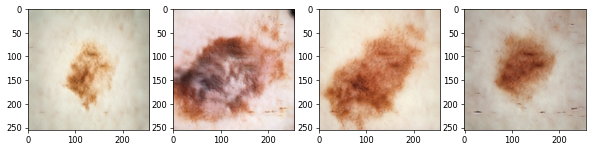

In [12]:
plot_images_last_four(target_cls_benign_alpha_2)
plot_images_last_four(target_cls_malignant_alpha_2)

In [13]:
#########################################
# target class: benign                  #
# type: synthetic images                #
# distribution: α = 0.80 | alpha_2      #
#########################################
# secondary class: benign               #
# type: real images                     #
#########################################
cossif.calculate_similarities(
    t_path=target_cls_benign_alpha_2, 
    s_path=secondary_cls_benign, 
    save_path=save_path, 
    file_name='ISIC-2016_FAGT_t_benign_alpha_2', 
    image_size=64,
    record_range=1
)

#########################################
# target class: malignant               #
# type: synthetic images                #
# distribution: α = 0.80 | alpha_2      #
#########################################
# secondary class: malignant            #
# type: real images                     #
#########################################
cossif.calculate_similarities(
    t_path=target_cls_malignant_alpha_2, 
    s_path=secondary_cls_malignant, 
    save_path=save_path, 
    file_name='ISIC-2016_FAGT_t_malignant_alpha_2', 
    image_size=64,
    record_range=1
)

+--------------+---------+
| TARGET CLASS | SAMPLES |
+--------------+---------+
|    benign    |   1351  |
+--------------+---------+
+-------------------------+---------+
| SECONDARY CLASS/CLASSES | SAMPLES |
+-------------------------+---------+
|          benign         |   727   |
+-------------------------+---------+
Resizing images of the target class...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1351/1351 [00:02<00:00, 527.43it/s]


Resizing images of the secondary class/classes...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:00<00:00, 737.77it/s]


Calculating Similarities...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1351/1351 [04:13<00:00,  5.32it/s]


+--------------+---------+
| TARGET CLASS | SAMPLES |
+--------------+---------+
|  malignant   |   1435  |
+--------------+---------+
+-------------------------+---------+
| SECONDARY CLASS/CLASSES | SAMPLES |
+-------------------------+---------+
|        malignant        |   173   |
+-------------------------+---------+
Resizing images of the target class...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1435/1435 [00:02<00:00, 526.90it/s]


Resizing images of the secondary class/classes...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 756.97it/s]


Calculating Similarities...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1435/1435 [01:04<00:00, 22.13it/s]


In [14]:
t_benign = np.load(os.path.join(save_path, 'ISIC-2016_FAGT_t_benign_alpha_2.npy'), allow_pickle=True)
t_malignant = np.load(os.path.join(save_path, 'ISIC-2016_FAGT_t_malignant_alpha_2.npy'), allow_pickle=True)

loaded_records = [
    {'class': 'benign', 'records': t_benign, 'type': 'dissimilar'}, 
    {'class': 'malignant', 'records': t_malignant, 'type': 'similar'}, 
]

alpha = {'id':'alpha_2', 'value': 0.80}

for i in loaded_records:
    print(f"{i['class']} || {alpha['id']} || {'{:.2f}'.format(alpha['value'])}")
    source_path = os.path.join(root, f"stylegan2-ada/oversampling/FAGT/{alpha['id']}/oversample/{i['class']}")
    filtered_path = os.path.join(root, f"stylegan2-ada/oversampling/FAGT/{alpha['id']}/filtered/{i['class']}")
    removed_path = os.path.join(root, f"stylegan2-ada/oversampling/FAGT/{alpha['id']}/removed/{i['class']}")

    cossif.export_filtered_images(
        source_dir=source_path, 
        filtered_dir=filtered_path, 
        removed_dir=removed_path, 
        set_R=i['records'], 
        remove=i['type'],
        alpha=alpha['value']
    )

benign || alpha_2 || 0.80
+--------------+-----------------+----------------+--------------------+------------+
| Total Images | Filtered Images | Removed Images |  Threshold Score   |   Order    |
+--------------+-----------------+----------------+--------------------+------------+
|     1351     |       1081      |      270       | 0.9892468296095294 | Dissimilar |
+--------------+-----------------+----------------+--------------------+------------+


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1351/1351 [00:06<00:00, 207.03it/s]


malignant || alpha_2 || 0.80
+--------------+-----------------+----------------+-------------------+---------+
| Total Images | Filtered Images | Removed Images |  Threshold Score  |  Order  |
+--------------+-----------------+----------------+-------------------+---------+
|     1435     |       1148      |      287       | 0.992533464035285 | Similar |
+--------------+-----------------+----------------+-------------------+---------+


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1435/1435 [00:09<00:00, 154.05it/s]


### α = 0.85 | alpha_3

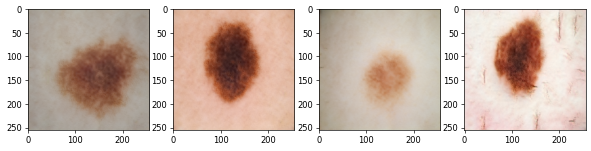

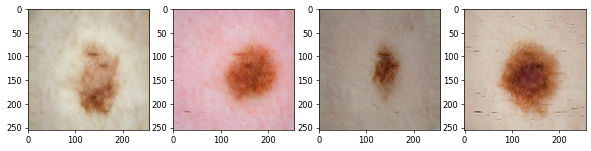

In [15]:
plot_images_last_four(target_cls_benign_alpha_3)
plot_images_last_four(target_cls_malignant_alpha_3)

In [16]:
#########################################
# target class: benign                  #
# type: synthetic images                #
# distribution: α = 0.85 | alpha_3      #
#########################################
# secondary class: benign               #
# type: real images                     #
#########################################
cossif.calculate_similarities(
    t_path=target_cls_benign_alpha_3, 
    s_path=secondary_cls_benign, 
    save_path=save_path, 
    file_name='ISIC-2016_FAGT_t_benign_alpha_3', 
    image_size=64,
    record_range=1
)

#########################################
# target class: malignant               #
# type: synthetic images                #
# distribution: α = 0.85 | alpha_3      #
#########################################
# secondary class: malignant            #
# type: real images                     #
#########################################
cossif.calculate_similarities(
    t_path=target_cls_malignant_alpha_3, 
    s_path=secondary_cls_malignant, 
    save_path=save_path, 
    file_name='ISIC-2016_FAGT_t_malignant_alpha_3', 
    image_size=64,
    record_range=1
)

+--------------+---------+
| TARGET CLASS | SAMPLES |
+--------------+---------+
|    benign    |   1271  |
+--------------+---------+
+-------------------------+---------+
| SECONDARY CLASS/CLASSES | SAMPLES |
+-------------------------+---------+
|          benign         |   727   |
+-------------------------+---------+
Resizing images of the target class...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1271/1271 [00:02<00:00, 523.20it/s]


Resizing images of the secondary class/classes...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:00<00:00, 737.14it/s]


Calculating Similarities...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1271/1271 [04:00<00:00,  5.28it/s]


+--------------+---------+
| TARGET CLASS | SAMPLES |
+--------------+---------+
|  malignant   |   1350  |
+--------------+---------+
+-------------------------+---------+
| SECONDARY CLASS/CLASSES | SAMPLES |
+-------------------------+---------+
|        malignant        |   173   |
+-------------------------+---------+
Resizing images of the target class...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1350/1350 [00:02<00:00, 532.26it/s]


Resizing images of the secondary class/classes...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 767.79it/s]


Calculating Similarities...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1350/1350 [01:00<00:00, 22.16it/s]


In [17]:
t_benign = np.load(os.path.join(save_path, 'ISIC-2016_FAGT_t_benign_alpha_3.npy'), allow_pickle=True)
t_malignant = np.load(os.path.join(save_path, 'ISIC-2016_FAGT_t_malignant_alpha_3.npy'), allow_pickle=True)

loaded_records = [
    {'class': 'benign', 'records': t_benign, 'type': 'dissimilar'}, 
    {'class': 'malignant', 'records': t_malignant, 'type': 'similar'}, 
]

alpha = {'id':'alpha_3', 'value': 0.85}

for i in loaded_records:
    print(f"{i['class']} || {alpha['id']} || {'{:.2f}'.format(alpha['value'])}")
    source_path = os.path.join(root, f"stylegan2-ada/oversampling/FAGT/{alpha['id']}/oversample/{i['class']}")
    filtered_path = os.path.join(root, f"stylegan2-ada/oversampling/FAGT/{alpha['id']}/filtered/{i['class']}")
    removed_path = os.path.join(root, f"stylegan2-ada/oversampling/FAGT/{alpha['id']}/removed/{i['class']}")

    cossif.export_filtered_images(
        source_dir=source_path, 
        filtered_dir=filtered_path, 
        removed_dir=removed_path, 
        set_R=i['records'], 
        remove=i['type'],
        alpha=alpha['value']
    )

benign || alpha_3 || 0.85
+--------------+-----------------+----------------+--------------------+------------+
| Total Images | Filtered Images | Removed Images |  Threshold Score   |   Order    |
+--------------+-----------------+----------------+--------------------+------------+
|     1271     |       1081      |      190       | 0.9878566948942774 | Dissimilar |
+--------------+-----------------+----------------+--------------------+------------+


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1271/1271 [00:05<00:00, 212.57it/s]


malignant || alpha_3 || 0.85
+--------------+-----------------+----------------+-------------------+---------+
| Total Images | Filtered Images | Removed Images |  Threshold Score  |  Order  |
+--------------+-----------------+----------------+-------------------+---------+
|     1350     |       1148      |      202       | 0.993113874850479 | Similar |
+--------------+-----------------+----------------+-------------------+---------+


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1350/1350 [00:08<00:00, 150.66it/s]
